In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [2]:
# Load data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
 x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

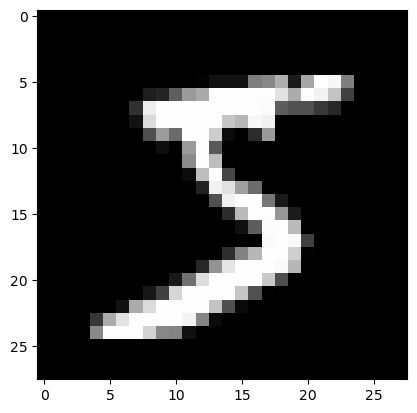

In [4]:
plt.imshow(x_train[0], cmap='gray')

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

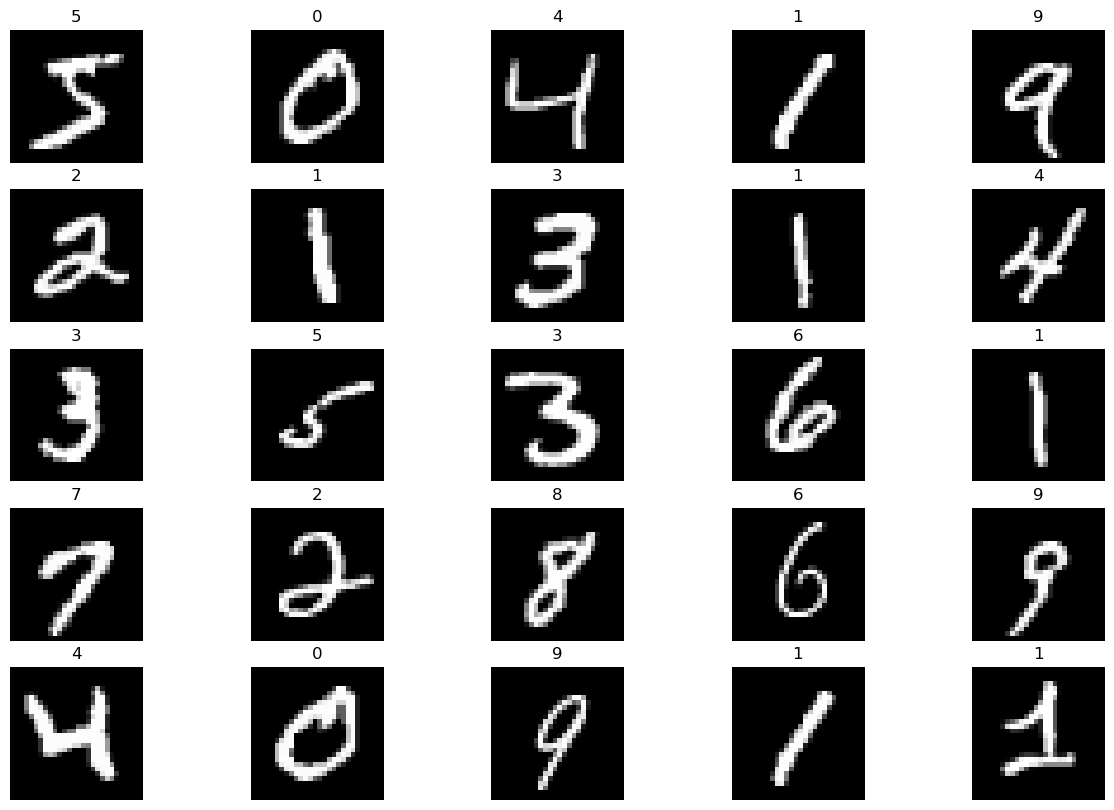

In [6]:
plt.figure(figsize=(15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])

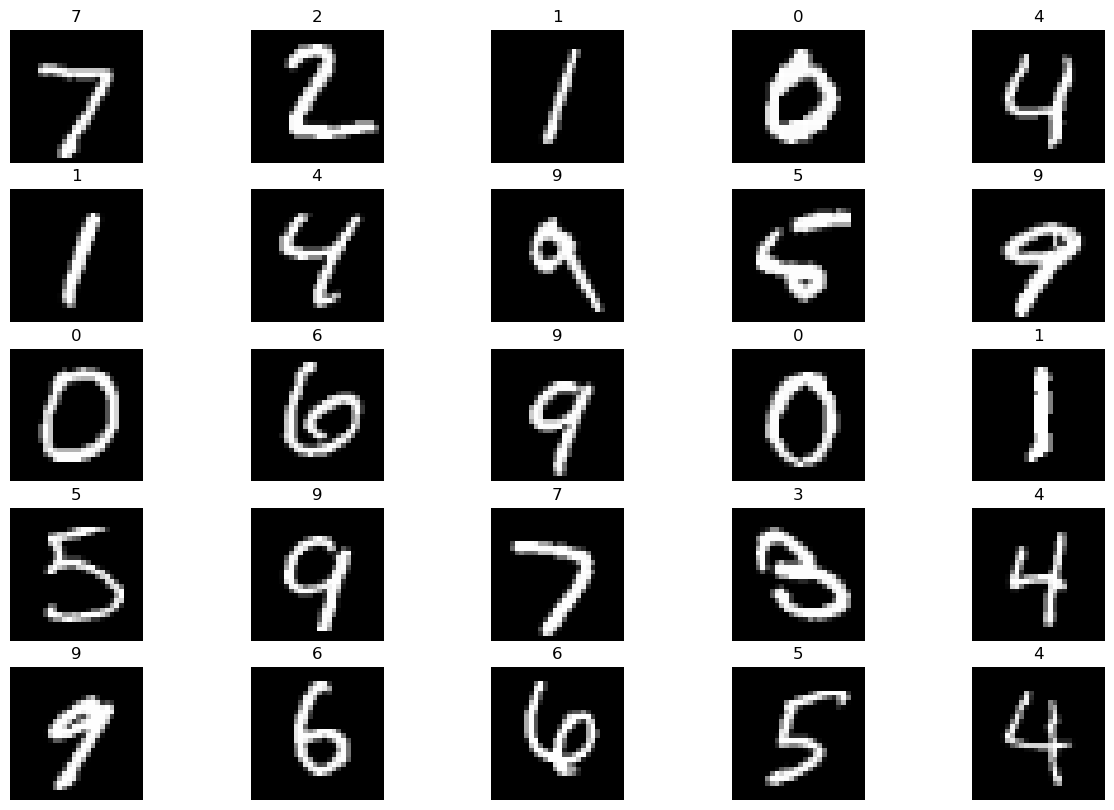

In [7]:
plt.figure(figsize=(15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(y_test[i])

#### Data Preparation

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Normalize :  Divide by 255

In [9]:
x_train= x_train/255
print(x_train)
x_test= x_test/255
print(x_test)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[0. 0. 0

#### Conert 2D data to 1D   : Methods -> Reshape, Flatten

In [10]:
x_train[0].shape #each image is of size 28x28

(28, 28)

In [11]:
x_train[0].size

784

In [12]:
## Flatten example

m=np.array([[6,7,6],[8,9,7]])
print(m)
print('\n',m.flatten())

[[6 7 6]
 [8 9 7]]

 [6 7 6 8 9 7]


In [13]:
## Reshape example

m=np.array([[6,7,6],[8,9,7]])
print(m)
print('\n',m.reshape(m.size))

[[6 7 6]
 [8 9 7]]

 [6 7 6 8 9 7]


## We will use Reshape here 

In [14]:
x_train = x_train.reshape(-1, x_train[0].size)
x_test = x_test.reshape(-1, x_test[0].size)

In [15]:
x_train.shape

(60000, 784)

In [16]:
x_test.shape

(10000, 784)

### Preppar output variables

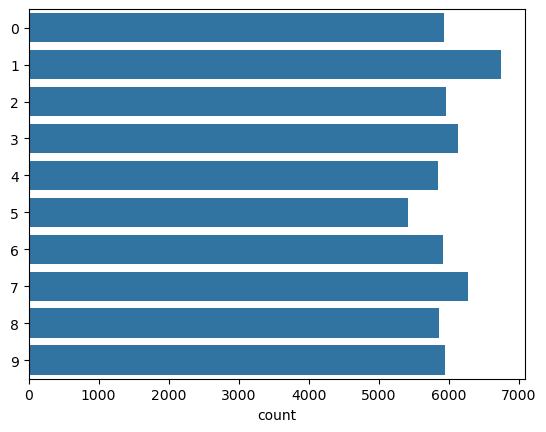

In [17]:
sns.countplot(y=y_train);

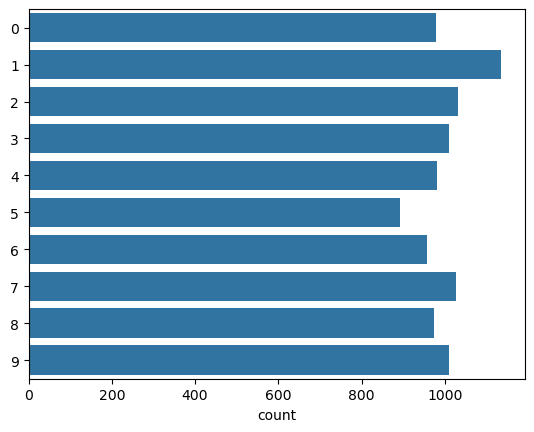

In [18]:
sns.countplot(y=y_test);

In [19]:
y_train.shape # We want 60000 data into columns 

(60000,)

In [20]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
y_train.shape

(60000, 10)

In [22]:
y_test.shape

(10000, 10)

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Build the model

In [30]:
model = Sequential()

#Input layer
model.add(Dense(512, input_shape=(784,), activation='relu'))

#Hidden Layer
model.add(Dense(128, activation='relu'))

#output layer
model.add(Dense(10, activation='softmax'))  #10-> bcz we have 10 classes

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
## Install Pydot for this
plot_model(model,  show_layer_activations=True, show_layer_names=True, 
          show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

### Compile Model

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train model

In [36]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10


6000/6000 [==============================] - 23s 4ms/step - loss: 0.1867 - accuracy: 0.9429
Epoch 2/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0872 - accuracy: 0.9734
Epoch 3/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0631 - accuracy: 0.9806
Epoch 4/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0490 - accuracy: 0.9850
Epoch 5/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0417 - accuracy: 0.9873
Epoch 6/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0365 - accuracy: 0.9888
Epoch 7/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0315 - accuracy: 0.9911
Epoch 8/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0282 - accuracy: 0.9917
Epoch 9/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0270 - accuracy: 0.9926
Epoch 10/10
6000/6000 [==============================] - 22s 4ms/step -

In [37]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 28s 3ms/step - loss: 0.1131 - accuracy: 0.9824


[0.11311441659927368, 0.9824000000953674]

### Predict on new image

In [38]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [39]:
new = x_test[1234]

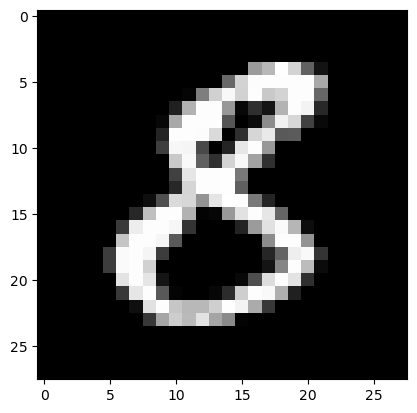

In [40]:
plt.imshow(new, cmap='gray')

In [46]:
new = new/255
new = new.reshape(1,784)
result = model.predict(new)
np.argmax(result)

1/1 [==============================] - 0s 42ms/step


8

## Loading new image pic and predict it|

In [99]:
import cv2

In [100]:
# Read image in gray scale
image=cv2.imread("images/digit_3.png",0)


In [101]:
image.size

24800

In [102]:
image.shape

(160, 155)

In [103]:
# Resize to 28x28 size
image = cv2.resize(image, (28,28))

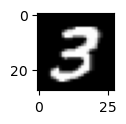

In [104]:
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')

In [105]:
# Rescale and Reshape the image
image = image/255
image = image.reshape(1,784)

# Predict the image
result1 = model.predict(image)
np.argmax(result1)

1/1 [==============================] - 0s 42ms/step


3